# Collaborative Filtering
# Project

## Title: Game Recommendation Prediction

#### Samad Shahid (2019446)
#### Harshita Gupta (2019467)

In [ ]:
!pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 4.1 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630165 sha256=3be527729ba0b9bf8c33a1aeac6a8f93a79ba7224541f4f0a54a7e5a7a9216a9
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import pandas as pd
from surprise import SVD
from surprise import dataset
from surprise import Reader
# from surprise import evaluate, print_perf


# df = pd.read_csv('/content/drive/MyDrive/CF/500k_data.zip (Unzipped Files)/500k_data.csv')

df = pd.read_csv('/content/drive/MyDrive/CF/1m-data.zip (Unzipped Files)/1m_data.csv')

# You'll need to create a dummy reader
reader = Reader(line_format='user item rating', rating_scale=(1, 5))

# Also, a dummy Dataset class
class MyDataset(dataset.DatasetAutoFolds):

    def __init__(self, df, reader):

        self.raw_ratings = [(uid, iid, r, None) for (uid, iid, r) in
                            zip(df['steamid'], df['appid'], df['voted_up'])]
        self.reader=reader

data = MyDataset(df, reader)

# You should now be able to use the data object normally.
# data.split(n_folds=3)
# algo = SVD()
# perf = evaluate(algo, data, measures=['RMSE', 'MAE'])
# print_perf(perf)

In [ ]:
type(data)

__main__.MyDataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from surprise import accuracy
from sklearn.metrics import mean_absolute_error
from surprise.model_selection import train_test_split

from surprise.model_selection import cross_validate

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.2, random_state=0)

# We'll use the famous SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
# algo.fit(trainset)
# predictions = algo.test(testset)

# # Then compute RMSE
# accuracy.rmse(predictions)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.3155  0.3167  0.3158  0.3163  0.3169  0.3162  0.0005  
MAE (testset)     0.0995  0.1003  0.0997  0.1001  0.1004  0.1000  0.0003  
Fit time          50.87   51.16   51.27   50.84   51.05   51.04   0.16    
Test time         2.62    3.10    2.72    2.66    2.66    2.75    0.18    


{'fit_time': (50.86987376213074,
  51.16435265541077,
  51.26600503921509,
  50.84270143508911,
  51.047364473342896),
 'test_mae': array([0.09951517, 0.10027022, 0.0997301 , 0.10007026, 0.10041504]),
 'test_rmse': array([0.31546007, 0.31665457, 0.31580057, 0.31633874, 0.31688326]),
 'test_time': (2.624681234359741,
  3.103130578994751,
  2.7231218814849854,
  2.663783073425293,
  2.659667730331421)}

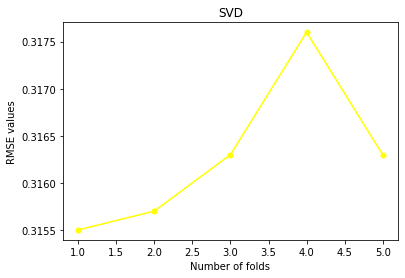

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


x = np.array([1,2,3,4,5])
y = np.array([0.3155, 0.3157, 0.3163, 0.3176, 0.3163])
plt.plot(x, y, color='yellow', marker='o', markersize=5)
plt.xlabel("Number of folds")
plt.ylabel("RMSE values")
plt.title("SVD")
plt.show()  # show first chart

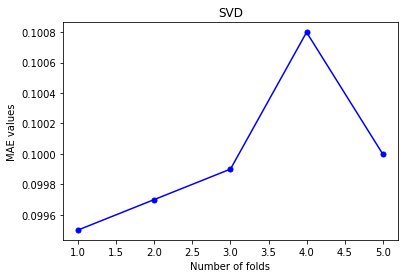

In [ ]:
x1 = np.array([1,2,3,4,5])
y1 = np.array([0.0995, 0.0997, 0.0999, 0.1008, 0.1000])
plt.plot(x1, y1, color='blue', marker='o', markersize=5)
plt.xlabel("Number of folds")
plt.ylabel("MAE values")
plt.title("SVD")
plt.show()  # show first chart

In [ ]:
algo = SVD(verbose=True)
# algo = NormalPredictor()
algo.fit(data.build_full_trainset())

# cross_validate(algo, train_data, verbose=True)

# print(algo.predict('76561197960675902', '70', r_ui=63, verbose=True))
# print(algo.predict('76561197960675902', '4540', r_ui=22, verbose=True))
# print(algo.predict('76561197960675902', '550', r_ui=791, verbose=True))
# print(algo.predict('76561197960675902', '10190', r_ui=1253, verbose=True))
# print(algo.predict('76561197960675902', '10', r_ui=1037, verbose=True))

predictions = algo.test(testset)

print(accuracy.rmse(predictions))

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
RMSE: 0.3167
0.31674911231605263


In [ ]:
ub_cos = [0.18142240386434441, 0.17347827985548926, 0.17241981469844322, 0.17041462470507742, 0.16947056021017892]
ib_cos = [0.18142330377734452, 0.17087927886549937, 0.1699881469744344, 0.167871462370607743, 0.15687096031027794]
# ub_dist = [ 0.17966188729303093, 0.18053917880781695, 0.17795639398783408, 0.17807077086475437, 0.17783108993305888]
# ib_dist = [ 0.1876643827702802, 0.18245873330187348, 0.18100270686618442, 0.18029349532633634, 0.18069434750023003]
x_axis = [5, 10, 15, 25, 50]

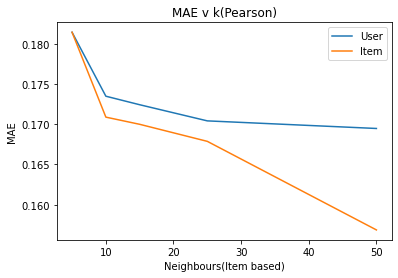

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("Neighbours(Item based)")
plt.ylabel("MAE")
plt.title("MAE v k(Pearson)")
plt.plot(x_axis, ub_cos, label = "User")
plt.plot(x_axis, ib_cos, label = "Item")
plt.legend()
plt.show()

